In [2]:
# # !pip install torch torchvision transformers pillow tqdm
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

this has been run on BLIP1, which is weaker and gave very generic captions 

In [1]:
import os
import torch
import pandas as pd
from tqdm import tqdm
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# === CONFIG ===
IMAGE_DIR = "/Users/chivo/Downloads/data_studio/coffee/ig_screenshots_vibe"
OUTPUT_CSV = "/Users/chivo/Downloads/data_studio/coffee/ig_blip_captions.csv"

# === Load model
device = "cuda" if torch.cuda.is_available() else "cpu"
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

# === List PNG images
image_paths = sorted([
    os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR)
    if f.lower().endswith(".png")
])

# === Caption images
results = []

for path in tqdm(image_paths, desc="Generating captions"):
    try:
        raw_image = Image.open(path).convert('RGB')
        inputs = processor(raw_image, return_tensors="pt").to(device)

        out = model.generate(**inputs, max_new_tokens=40)
        caption = processor.decode(out[0], skip_special_tokens=True)

        results.append({"image_path": path, "caption": caption})
    except Exception as e:
        results.append({"image_path": path, "caption": f"[ERROR] {str(e)}"})

# === Save to CSV
df = pd.DataFrame(results)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✅ Saved {len(df)} captions to {OUTPUT_CSV}")


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Generating captions:   0%|          | 0/5191 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Generating captions: 100%|██████████| 5191/5191 [55:58<00:00,  1.55it/s]  

✅ Saved 5191 captions to /Users/chivo/Downloads/data_studio/coffee/ig_blip_captions.csv


In [3]:
!pip install fastopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 81.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 85.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 84.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 74.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1
    Uninstalling torch-2.5.1:
      Successfully uninstalled torch-2.5.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1
    Uninstalling torchvision-0.20.1:
      S

In [4]:
import pandas as pd
from topmost import Preprocess
from fastopic import FASTopic

# === Load bios ===
csv_path = "/Users/chivo/Downloads/data_studio/coffee/IG_OCR_with_Matched_City (final).csv"
df = pd.read_csv(csv_path)

# Drop rows with empty bios
df = df.dropna(subset=["ocr_text"])
docs = df["ocr_text"].astype(str).tolist()

# === Run unsupervised topic modeling ===
preprocess = Preprocess()
n_topics = 30  # Tune based on desired granularity
model = FASTopic(n_topics, preprocess)
top_words, doc_topic_dist = model.fit_transform(docs)

# === Add topic distributions to original dataframe ===
for i in range(n_topics):
    df[f"topic_{i}"] = doc_topic_dist[:, i]

# Save the topic descriptions
topic_labels = {f"Topic_{i+1}": words for i, words in enumerate(top_words)}
topic_df = pd.DataFrame.from_dict(topic_labels, orient="index", columns=[f"Word_{j+1}" for j in range(len(top_words[0]))])

# === Export ===
df.to_csv("/Users/chivo/Downloads/data_studio/coffee/ocr_bios_with_topics.csv", index=False)
topic_df.to_csv("/Users/chivo/Downloads/data_studio/coffee/top_words_for_ocr_bios.csv")

print("✅ Theme extraction complete and saved.")


AttributeError: module 'openai' has no attribute 'OpenAI'

Let's try a combination of BLIP‑2 (FLaN‑T5‑XL), ColorThief, OWL‑ViT (google/owlvit-base-patch32) and BLIP‑2 mini‑prompt (+ fallback OpenCV triangle check)

In [5]:
!pip install torch torchvision transformers pillow colorthief opencv-python tqdm



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import os, json, cv2, torch
import pandas as pd
from PIL import Image
from pathlib import Path
from tqdm import tqdm
from colorthief import ColorThief
from transformers import (
    Blip2Processor, Blip2ForConditionalGeneration,
    pipeline as hf_pipeline
)

# ---------- CONFIG ----------
IMG_DIR   = "/Users/chivo/Downloads/data_studio/coffee/ig_screenshots_vibe"
OUT_CSV   = "/Users/chivo/Downloads/data_studio/coffee/ig_visual_analysis.csv"
N_TOPICS  = 30                       # BLIP‑2 theme count (10‑12 returned)
OBJ_SCORE = 0.20                     # min conf for OWL‑ViT objects
SAVE_EVERY = 25
DEVICE   = "cuda" if torch.cuda.is_available() else "cpu"
# --------------------------------

# -------- Load BLIP‑2 once --------
print("🔹  Loading BLIP‑2 …")
blip_proc = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
blip_mod  = Blip2ForConditionalGeneration.from_pretrained(
              "Salesforce/blip2-flan-t5-xl",
              torch_dtype=torch.float16 if DEVICE=="cuda" else torch.float32
            ).to(DEVICE)

# -------- OWL‑ViT zero‑shot OD -------
print("🔹  Loading OWL‑ViT …")
owl_pipe = hf_pipeline(
    task="zero-shot-object-detection",
    model="google/owlvit-base-patch32",
    device=0 if DEVICE=="cuda" else -1
)

OBJECT_QUERIES = [
    "coffee cup", "latte", "plant", "flower", "tree",
    "barista", "person", "table", "counter", "chair",
    "dog", "cat", "dessert", "bag", "logo", "sign"
]

# ---------- helpers -----------
def get_dominant_color(path):
    try:
        rgb = ColorThief(path).get_color(quality=2)
        hex_ = f'#{rgb[0]:02x}{rgb[1]:02x}{rgb[2]:02x}'
        return rgb, hex_
    except Exception:
        return (None, None)

def blip2_json_prompt(image, prompt, max_tokens=120):
    try:
        inputs = blip_proc(image, prompt, return_tensors="pt").to(
            DEVICE, torch.float16 if DEVICE=="cuda" else torch.float32
        )
        out = blip_mod.generate(**inputs, max_new_tokens=max_tokens)
        txt = blip_proc.tokenizer.decode(out[0], skip_special_tokens=True)
        return txt.strip()
    except Exception as e:
        return f"[ERROR] {e}"

def detect_media_type(path):
    # simple play‑button detection  – fallback
    img = cv2.imread(path)
    if img is None: return "unknown"
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, th = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    contours,_ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for c in contours:
        if 300 < cv2.contourArea(c) < 4000:
            approx = cv2.approxPolyDP(c, 0.15*cv2.arcLength(c,True), True)
            if len(approx) == 3:
                return "video or both"
    return "image"

# ---------- BLIP‑2 prompts ----------
THEME_PROMPT = (
    "List 10–12 short visual branding themes for this Instagram café "
    "profile screenshot. Return JSON: {\"themes\":[…],\"color_tone\":\"…\"}"
)
MEDIA_PROMPT = (
    "Does this Instagram screenshot include only static images, "
    "only video thumbnails, or both? Answer JUST one word: image, video, or both."
)

# ---------- run ----------
paths = sorted([str(p) for p in Path(IMG_DIR).glob("*.png")])
rows, cache = [], 0

for i, p in enumerate(tqdm(paths, desc="Analysing screenshots")):
    try:
        img = Image.open(p).convert("RGB")

        # 1) dominant colour
        rgb, hexcol = get_dominant_color(p)

        # 2) BLIP‑2 visual themes
        reply = blip2_json_prompt(img, THEME_PROMPT)
        try:
            themes_json = json.loads(reply)
            theme_list  = "; ".join(themes_json.get("themes", []))
            color_tone  = themes_json.get("color_tone", "")
        except Exception:
            theme_list, color_tone = "", ""
        
        # 3) objects via OWL‑ViT
        detections = owl_pipe(img, candidate_labels=OBJECT_QUERIES)
        obj_list = [d["label"] for d in detections if d["score"] >= OBJ_SCORE]
        obj_str  = "; ".join(sorted(set(obj_list)))

        # 4) media type – quick BLIP‑2 yes/no fallback
        media_reply = blip2_json_prompt(img, MEDIA_PROMPT, max_tokens=5)
        if "image" not in media_reply and "video" not in media_reply:
            media_reply = detect_media_type(p)

        rows.append({
            "image_path": p,
            "dominant_rgb": rgb,
            "dominant_hex": hexcol,
            "color_tone": color_tone,
            "visual_themes": theme_list,
            "objects": obj_str,
            "media_type": media_reply
        })

    except Exception as e:
        rows.append({"image_path": p, "visual_themes": "[ERROR]", "objects": "", "media_type": "", "dominant_rgb": "", "dominant_hex": "", "color_tone": str(e)})

    # interim save
    cache += 1
    if cache == SAVE_EVERY:
        pd.DataFrame(rows).to_csv(OUT_CSV, index=False)
        cache = 0
        print(f"💾 interim save ({len(rows)} rows)")

# final save
pd.DataFrame(rows).to_csv(OUT_CSV, index=False)
print(f"✅ Finished. Saved {len(rows)} rows → {OUT_CSV}")


🔹  Loading BLIP‑2 …


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.22k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/128k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

🔹  Loading OWL‑ViT …


config.json:   0%|          | 0.00/4.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/613M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu
Analysing screenshots:   0%|          | 25/5191 [03:54<12:11:53,  8.50s/it]

💾 interim save (25 rows)


Analysing screenshots:   1%|          | 50/5191 [07:37<12:56:23,  9.06s/it]

💾 interim save (50 rows)


Analysing screenshots:   1%|▏         | 75/5191 [11:14<11:57:52,  8.42s/it]

💾 interim save (75 rows)


Analysing screenshots:   2%|▏         | 100/5191 [14:45<11:30:57,  8.14s/it]

💾 interim save (100 rows)


Analysing screenshots:   2%|▏         | 125/5191 [18:15<11:31:15,  8.19s/it]

💾 interim save (125 rows)


Analysing screenshots:   3%|▎         | 150/5191 [21:48<11:37:17,  8.30s/it]

💾 interim save (150 rows)


Analysing screenshots:   3%|▎         | 175/5191 [25:46<11:55:26,  8.56s/it]

💾 interim save (175 rows)


Analysing screenshots:   4%|▍         | 200/5191 [29:13<11:52:41,  8.57s/it]

💾 interim save (200 rows)


Analysing screenshots:   4%|▍         | 225/5191 [32:38<11:11:55,  8.12s/it]

💾 interim save (225 rows)


Analysing screenshots:   5%|▍         | 250/5191 [36:04<11:32:48,  8.41s/it]

💾 interim save (250 rows)


Analysing screenshots:   5%|▌         | 275/5191 [39:30<11:23:18,  8.34s/it]

💾 interim save (275 rows)


Analysing screenshots:   6%|▌         | 300/5191 [43:03<10:54:33,  8.03s/it]

💾 interim save (300 rows)


Analysing screenshots:   6%|▋         | 325/5191 [46:22<9:56:40,  7.36s/it] 

💾 interim save (325 rows)


Analysing screenshots:   7%|▋         | 350/5191 [49:47<11:29:36,  8.55s/it]

💾 interim save (350 rows)


Analysing screenshots:   7%|▋         | 375/5191 [53:15<11:19:26,  8.46s/it]

💾 interim save (375 rows)


Analysing screenshots:   8%|▊         | 400/5191 [56:44<11:26:16,  8.59s/it]

💾 interim save (400 rows)


Analysing screenshots:   8%|▊         | 425/5191 [1:00:14<10:46:32,  8.14s/it]

💾 interim save (425 rows)


Analysing screenshots:   9%|▊         | 450/5191 [1:03:48<11:17:14,  8.57s/it]

💾 interim save (450 rows)


Analysing screenshots:   9%|▉         | 475/5191 [1:07:15<10:50:39,  8.28s/it]

💾 interim save (475 rows)


Analysing screenshots:  10%|▉         | 500/5191 [1:10:45<11:18:04,  8.67s/it]

💾 interim save (500 rows)


Analysing screenshots:  10%|█         | 525/5191 [1:14:24<11:37:32,  8.97s/it]

💾 interim save (525 rows)


Analysing screenshots:  11%|█         | 550/5191 [1:17:52<11:34:05,  8.97s/it]

💾 interim save (550 rows)


Analysing screenshots:  11%|█         | 575/5191 [1:21:28<10:34:31,  8.25s/it]

💾 interim save (575 rows)


Analysing screenshots:  12%|█▏        | 600/5191 [1:24:55<11:00:23,  8.63s/it]

💾 interim save (600 rows)


Analysing screenshots:  12%|█▏        | 625/5191 [1:28:26<11:01:01,  8.69s/it]

💾 interim save (625 rows)


Analysing screenshots:  13%|█▎        | 650/5191 [1:31:55<10:18:16,  8.17s/it]

💾 interim save (650 rows)


Analysing screenshots:  13%|█▎        | 675/5191 [1:35:19<9:58:41,  7.95s/it] 

💾 interim save (675 rows)


Analysing screenshots:  13%|█▎        | 700/5191 [1:38:36<9:43:27,  7.80s/it] 

💾 interim save (700 rows)


Analysing screenshots:  14%|█▍        | 725/5191 [1:41:59<10:11:20,  8.21s/it]

💾 interim save (725 rows)


Analysing screenshots:  14%|█▍        | 750/5191 [1:45:29<10:21:39,  8.40s/it]

💾 interim save (750 rows)


Analysing screenshots:  15%|█▍        | 775/5191 [1:48:59<10:18:31,  8.40s/it]

💾 interim save (775 rows)


Analysing screenshots:  15%|█▌        | 800/5191 [1:52:27<10:12:07,  8.36s/it]

💾 interim save (800 rows)


Analysing screenshots:  16%|█▌        | 825/5191 [1:55:58<10:00:12,  8.25s/it]

💾 interim save (825 rows)


Analysing screenshots:  16%|█▋        | 850/5191 [1:59:19<9:14:17,  7.66s/it] 

💾 interim save (850 rows)


Analysing screenshots:  17%|█▋        | 875/5191 [2:02:52<10:03:49,  8.39s/it]

💾 interim save (875 rows)


Analysing screenshots:  17%|█▋        | 900/5191 [2:06:14<10:14:36,  8.59s/it]

💾 interim save (900 rows)


Analysing screenshots:  18%|█▊        | 925/5191 [2:09:27<8:45:45,  7.39s/it] 

💾 interim save (925 rows)


Analysing screenshots:  18%|█▊        | 950/5191 [2:12:45<9:26:37,  8.02s/it]

💾 interim save (950 rows)


Analysing screenshots:  19%|█▉        | 975/5191 [2:16:05<9:46:00,  8.34s/it]

💾 interim save (975 rows)


Analysing screenshots:  19%|█▉        | 1000/5191 [2:19:25<9:23:16,  8.06s/it]

💾 interim save (1000 rows)


Analysing screenshots:  20%|█▉        | 1025/5191 [2:22:40<8:59:41,  7.77s/it]

💾 interim save (1025 rows)


Analysing screenshots:  20%|██        | 1050/5191 [2:26:00<9:14:30,  8.03s/it]

💾 interim save (1050 rows)


Analysing screenshots:  21%|██        | 1075/5191 [2:29:19<9:06:20,  7.96s/it]

💾 interim save (1075 rows)


Analysing screenshots:  21%|██        | 1100/5191 [2:32:31<8:27:05,  7.44s/it]

💾 interim save (1100 rows)


Analysing screenshots:  22%|██▏       | 1125/5191 [2:35:49<8:45:22,  7.75s/it]

💾 interim save (1125 rows)


Analysing screenshots:  22%|██▏       | 1150/5191 [2:39:04<8:45:59,  7.81s/it]

💾 interim save (1150 rows)


Analysing screenshots:  23%|██▎       | 1175/5191 [2:42:06<7:44:06,  6.93s/it]

💾 interim save (1175 rows)


Analysing screenshots:  23%|██▎       | 1200/5191 [2:45:01<8:21:38,  7.54s/it]

💾 interim save (1200 rows)


Analysing screenshots:  24%|██▎       | 1225/5191 [2:48:14<8:36:16,  7.81s/it]

💾 interim save (1225 rows)


Analysing screenshots:  24%|██▍       | 1250/5191 [2:51:25<8:33:37,  7.82s/it]

💾 interim save (1250 rows)


Analysing screenshots:  25%|██▍       | 1275/5191 [2:55:35<16:02:09, 14.74s/it]

💾 interim save (1275 rows)


Analysing screenshots:  25%|██▌       | 1300/5191 [2:59:18<14:09:57, 13.11s/it]

💾 interim save (1300 rows)


Analysing screenshots:  26%|██▌       | 1325/5191 [3:08:24<8:38:20,  8.04s/it] 

💾 interim save (1325 rows)


Analysing screenshots:  26%|██▌       | 1350/5191 [3:11:39<8:17:17,  7.77s/it]

💾 interim save (1350 rows)


Analysing screenshots:  26%|██▋       | 1375/5191 [3:14:59<9:07:42,  8.61s/it]

💾 interim save (1375 rows)


Analysing screenshots:  27%|██▋       | 1400/5191 [3:18:20<8:16:26,  7.86s/it]

💾 interim save (1400 rows)


Analysing screenshots:  27%|██▋       | 1425/5191 [3:21:40<8:22:02,  8.00s/it]

💾 interim save (1425 rows)


Analysing screenshots:  28%|██▊       | 1450/5191 [3:25:01<8:32:47,  8.22s/it]

💾 interim save (1450 rows)


Analysing screenshots:  28%|██▊       | 1475/5191 [3:28:54<8:09:56,  7.91s/it] 

💾 interim save (1475 rows)


Analysing screenshots:  29%|██▉       | 1500/5191 [3:32:06<7:42:02,  7.51s/it]

💾 interim save (1500 rows)


Analysing screenshots:  29%|██▉       | 1525/5191 [3:35:12<7:19:51,  7.20s/it]

💾 interim save (1525 rows)


Analysing screenshots:  30%|██▉       | 1550/5191 [3:38:18<7:37:23,  7.54s/it]

💾 interim save (1550 rows)


Analysing screenshots:  30%|███       | 1575/5191 [3:41:34<7:56:08,  7.90s/it]

💾 interim save (1575 rows)


Analysing screenshots:  31%|███       | 1600/5191 [3:44:50<7:31:46,  7.55s/it]

💾 interim save (1600 rows)


Analysing screenshots:  31%|███▏      | 1625/5191 [3:48:17<8:07:08,  8.20s/it]

💾 interim save (1625 rows)


Analysing screenshots:  32%|███▏      | 1650/5191 [3:51:30<7:33:17,  7.68s/it]

💾 interim save (1650 rows)


Analysing screenshots:  32%|███▏      | 1675/5191 [3:54:33<7:05:57,  7.27s/it]

💾 interim save (1675 rows)


Analysing screenshots:  33%|███▎      | 1700/5191 [3:57:39<7:14:13,  7.46s/it]

💾 interim save (1700 rows)


Analysing screenshots:  33%|███▎      | 1725/5191 [4:00:54<7:34:43,  7.87s/it]

💾 interim save (1725 rows)


Analysing screenshots:  34%|███▎      | 1750/5191 [4:04:20<7:27:31,  7.80s/it] 

💾 interim save (1750 rows)


Analysing screenshots:  34%|███▍      | 1775/5191 [4:07:30<6:48:26,  7.17s/it]

💾 interim save (1775 rows)


Analysing screenshots:  35%|███▍      | 1800/5191 [4:10:39<7:20:35,  7.80s/it]

💾 interim save (1800 rows)


Analysing screenshots:  35%|███▌      | 1825/5191 [4:13:52<7:07:21,  7.62s/it]

💾 interim save (1825 rows)


Analysing screenshots:  36%|███▌      | 1850/5191 [4:17:01<7:17:55,  7.86s/it]

💾 interim save (1850 rows)


Analysing screenshots:  36%|███▌      | 1875/5191 [4:20:05<6:37:45,  7.20s/it]

💾 interim save (1875 rows)


Analysing screenshots:  37%|███▋      | 1900/5191 [4:23:06<6:41:05,  7.31s/it]

💾 interim save (1900 rows)


Analysing screenshots:  37%|███▋      | 1925/5191 [4:26:19<6:56:03,  7.64s/it]

💾 interim save (1925 rows)


Analysing screenshots:  38%|███▊      | 1950/5191 [4:29:57<6:28:38,  7.19s/it] 

💾 interim save (1950 rows)


Analysing screenshots:  38%|███▊      | 1975/5191 [4:33:08<6:09:50,  6.90s/it] 

💾 interim save (1975 rows)


Analysing screenshots:  39%|███▊      | 2000/5191 [4:36:15<6:29:51,  7.33s/it]

💾 interim save (2000 rows)


Analysing screenshots:  39%|███▉      | 2025/5191 [4:39:08<6:21:07,  7.22s/it]

💾 interim save (2025 rows)


Analysing screenshots:  39%|███▉      | 2050/5191 [4:42:10<6:21:49,  7.29s/it]

💾 interim save (2050 rows)


Analysing screenshots:  40%|███▉      | 2075/5191 [4:45:15<6:28:53,  7.49s/it]

💾 interim save (2075 rows)


Analysing screenshots:  40%|████      | 2100/5191 [4:48:16<6:15:19,  7.29s/it]

💾 interim save (2100 rows)


Analysing screenshots:  41%|████      | 2125/5191 [4:52:06<7:34:04,  8.89s/it]

💾 interim save (2125 rows)


Analysing screenshots:  41%|████▏     | 2150/5191 [4:55:57<7:54:19,  9.36s/it]

💾 interim save (2150 rows)


Analysing screenshots:  42%|████▏     | 2175/5191 [5:10:44<27:02:02, 32.27s/it]  

💾 interim save (2175 rows)


Analysing screenshots:  42%|████▏     | 2200/5191 [5:14:26<7:19:38,  8.82s/it] 

💾 interim save (2200 rows)


Analysing screenshots:  43%|████▎     | 2225/5191 [5:18:36<8:22:24, 10.16s/it]

💾 interim save (2225 rows)


Analysing screenshots:  43%|████▎     | 2250/5191 [5:55:39<16:10:32, 19.80s/it]  

💾 interim save (2250 rows)


Analysing screenshots:  44%|████▍     | 2275/5191 [6:19:46<13:24:47, 16.56s/it]  

💾 interim save (2275 rows)


Analysing screenshots:  44%|████▍     | 2300/5191 [6:42:50<17:14:24, 21.47s/it]  

💾 interim save (2300 rows)


Analysing screenshots:  45%|████▍     | 2325/5191 [7:16:32<9:38:03, 12.10s/it]   

💾 interim save (2325 rows)


Analysing screenshots:  45%|████▌     | 2350/5191 [7:50:16<15:33:02, 19.71s/it]  

💾 interim save (2350 rows)


Analysing screenshots:  46%|████▌     | 2375/5191 [8:16:37<32:48:27, 41.94s/it]  

💾 interim save (2375 rows)


Analysing screenshots:  46%|████▌     | 2400/5191 [8:35:29<7:40:34,  9.90s/it]   

💾 interim save (2400 rows)


Analysing screenshots:  47%|████▋     | 2425/5191 [9:11:53<13:36:06, 17.70s/it]  

💾 interim save (2425 rows)


Analysing screenshots:  47%|████▋     | 2450/5191 [9:50:09<43:00:47, 56.49s/it]  

💾 interim save (2450 rows)


Analysing screenshots:  48%|████▊     | 2475/5191 [10:11:33<26:04:34, 34.56s/it]  

💾 interim save (2475 rows)


Analysing screenshots:  48%|████▊     | 2500/5191 [10:15:34<7:03:29,  9.44s/it] 

💾 interim save (2500 rows)


Analysing screenshots:  49%|████▊     | 2525/5191 [10:19:32<7:29:41, 10.12s/it]

💾 interim save (2525 rows)


Analysing screenshots:  49%|████▉     | 2550/5191 [10:23:38<7:00:32,  9.55s/it]

💾 interim save (2550 rows)


Analysing screenshots:  50%|████▉     | 2575/5191 [10:27:36<6:51:50,  9.45s/it]

💾 interim save (2575 rows)


Analysing screenshots:  50%|█████     | 2600/5191 [10:31:33<6:38:15,  9.22s/it]

💾 interim save (2600 rows)


Analysing screenshots:  51%|█████     | 2625/5191 [10:35:35<7:05:34,  9.95s/it]

💾 interim save (2625 rows)


Analysing screenshots:  51%|█████     | 2650/5191 [10:39:04<5:35:47,  7.93s/it]

💾 interim save (2650 rows)


Analysing screenshots:  52%|█████▏    | 2675/5191 [10:42:09<5:10:36,  7.41s/it]

💾 interim save (2675 rows)


Analysing screenshots:  52%|█████▏    | 2700/5191 [10:45:13<4:54:07,  7.08s/it]

💾 interim save (2700 rows)


Analysing screenshots:  52%|█████▏    | 2725/5191 [10:48:15<5:21:53,  7.83s/it]

💾 interim save (2725 rows)


Analysing screenshots:  53%|█████▎    | 2750/5191 [10:51:28<5:05:57,  7.52s/it]

💾 interim save (2750 rows)


Analysing screenshots:  53%|█████▎    | 2775/5191 [10:54:38<5:02:03,  7.50s/it]

💾 interim save (2775 rows)


Analysing screenshots:  54%|█████▍    | 2800/5191 [10:57:45<5:05:03,  7.66s/it]

💾 interim save (2800 rows)


Analysing screenshots:  54%|█████▍    | 2825/5191 [11:00:59<5:14:18,  7.97s/it]

💾 interim save (2825 rows)


Analysing screenshots:  55%|█████▍    | 2850/5191 [11:04:19<4:52:49,  7.51s/it]

💾 interim save (2850 rows)


Analysing screenshots:  55%|█████▌    | 2875/5191 [11:07:25<4:55:50,  7.66s/it]

💾 interim save (2875 rows)


Analysing screenshots:  56%|█████▌    | 2900/5191 [11:10:34<4:47:17,  7.52s/it]

💾 interim save (2900 rows)


Analysing screenshots:  56%|█████▋    | 2925/5191 [11:13:39<4:47:10,  7.60s/it]

💾 interim save (2925 rows)


Analysing screenshots:  57%|█████▋    | 2950/5191 [11:16:52<4:52:53,  7.84s/it]

💾 interim save (2950 rows)


Analysing screenshots:  57%|█████▋    | 2975/5191 [11:20:03<4:43:37,  7.68s/it]

💾 interim save (2975 rows)


Analysing screenshots:  58%|█████▊    | 3000/5191 [11:23:16<4:42:37,  7.74s/it]

💾 interim save (3000 rows)


Analysing screenshots:  58%|█████▊    | 3025/5191 [11:26:43<5:01:01,  8.34s/it]

💾 interim save (3025 rows)


Analysing screenshots:  59%|█████▉    | 3050/5191 [11:30:13<4:59:19,  8.39s/it]

💾 interim save (3050 rows)


Analysing screenshots:  59%|█████▉    | 3075/5191 [11:33:31<4:25:36,  7.53s/it]

💾 interim save (3075 rows)


Analysing screenshots:  60%|█████▉    | 3100/5191 [11:36:36<4:05:20,  7.04s/it]

💾 interim save (3100 rows)


Analysing screenshots:  60%|██████    | 3125/5191 [11:39:41<4:13:03,  7.35s/it]

💾 interim save (3125 rows)


Analysing screenshots:  61%|██████    | 3150/5191 [11:42:45<4:23:14,  7.74s/it]

💾 interim save (3150 rows)


Analysing screenshots:  61%|██████    | 3175/5191 [11:45:52<4:09:38,  7.43s/it]

💾 interim save (3175 rows)


Analysing screenshots:  62%|██████▏   | 3200/5191 [11:48:54<3:55:51,  7.11s/it]

💾 interim save (3200 rows)


Analysing screenshots:  62%|██████▏   | 3225/5191 [11:51:57<4:03:50,  7.44s/it]

💾 interim save (3225 rows)


Analysing screenshots:  63%|██████▎   | 3250/5191 [11:54:49<3:42:32,  6.88s/it]

💾 interim save (3250 rows)


Analysing screenshots:  63%|██████▎   | 3275/5191 [11:57:42<3:41:38,  6.94s/it]

💾 interim save (3275 rows)


Analysing screenshots:  64%|██████▎   | 3300/5191 [12:00:36<3:37:48,  6.91s/it]

💾 interim save (3300 rows)


Analysing screenshots:  64%|██████▍   | 3325/5191 [12:03:30<3:31:06,  6.79s/it]

💾 interim save (3325 rows)


Analysing screenshots:  65%|██████▍   | 3350/5191 [12:06:28<3:32:02,  6.91s/it]

💾 interim save (3350 rows)


Analysing screenshots:  65%|██████▌   | 3375/5191 [12:09:35<3:37:49,  7.20s/it]

💾 interim save (3375 rows)


Analysing screenshots:  65%|██████▌   | 3400/5191 [12:12:28<3:26:22,  6.91s/it]

💾 interim save (3400 rows)


Analysing screenshots:  66%|██████▌   | 3425/5191 [12:15:20<3:15:55,  6.66s/it]

💾 interim save (3425 rows)


Analysing screenshots:  66%|██████▋   | 3450/5191 [12:18:11<3:22:03,  6.96s/it]

💾 interim save (3450 rows)


Analysing screenshots:  67%|██████▋   | 3475/5191 [12:21:18<3:29:34,  7.33s/it]

💾 interim save (3475 rows)


Analysing screenshots:  67%|██████▋   | 3500/5191 [12:24:19<3:29:39,  7.44s/it]

💾 interim save (3500 rows)


Analysing screenshots:  68%|██████▊   | 3525/5191 [12:27:30<3:36:57,  7.81s/it]

💾 interim save (3525 rows)


Analysing screenshots:  68%|██████▊   | 3550/5191 [12:30:38<3:25:09,  7.50s/it]

💾 interim save (3550 rows)


Analysing screenshots:  69%|██████▉   | 3575/5191 [12:33:47<3:27:34,  7.71s/it]

💾 interim save (3575 rows)


Analysing screenshots:  69%|██████▉   | 3600/5191 [12:36:52<3:14:20,  7.33s/it]

💾 interim save (3600 rows)


Analysing screenshots:  70%|██████▉   | 3625/5191 [12:39:56<3:14:45,  7.46s/it]

💾 interim save (3625 rows)


Analysing screenshots:  70%|███████   | 3650/5191 [12:42:55<2:58:25,  6.95s/it]

💾 interim save (3650 rows)


Analysing screenshots:  71%|███████   | 3675/5191 [12:45:53<3:13:00,  7.64s/it]

💾 interim save (3675 rows)


Analysing screenshots:  71%|███████▏  | 3700/5191 [12:49:11<3:27:16,  8.34s/it]

💾 interim save (3700 rows)


Analysing screenshots:  72%|███████▏  | 3725/5191 [12:52:13<2:43:14,  6.68s/it]

💾 interim save (3725 rows)


Analysing screenshots:  72%|███████▏  | 3750/5191 [12:55:02<2:42:31,  6.77s/it]

💾 interim save (3750 rows)


Analysing screenshots:  73%|███████▎  | 3775/5191 [12:57:51<2:34:20,  6.54s/it]

💾 interim save (3775 rows)


Analysing screenshots:  73%|███████▎  | 3800/5191 [13:00:40<2:34:03,  6.65s/it]

💾 interim save (3800 rows)


Analysing screenshots:  74%|███████▎  | 3825/5191 [13:03:29<2:34:49,  6.80s/it]

💾 interim save (3825 rows)


Analysing screenshots:  74%|███████▍  | 3850/5191 [13:06:17<2:26:32,  6.56s/it]

💾 interim save (3850 rows)


Analysing screenshots:  75%|███████▍  | 3875/5191 [13:09:07<2:27:07,  6.71s/it]

💾 interim save (3875 rows)


Analysing screenshots:  75%|███████▌  | 3900/5191 [13:11:56<2:25:21,  6.76s/it]

💾 interim save (3900 rows)


Analysing screenshots:  76%|███████▌  | 3925/5191 [13:14:47<2:24:46,  6.86s/it]

💾 interim save (3925 rows)


Analysing screenshots:  76%|███████▌  | 3950/5191 [13:17:36<2:19:18,  6.74s/it]

💾 interim save (3950 rows)


Analysing screenshots:  77%|███████▋  | 3975/5191 [13:20:25<2:17:49,  6.80s/it]

💾 interim save (3975 rows)


Analysing screenshots:  77%|███████▋  | 4000/5191 [13:23:12<2:16:39,  6.88s/it]

💾 interim save (4000 rows)


Analysing screenshots:  78%|███████▊  | 4025/5191 [13:26:01<2:08:51,  6.63s/it]

💾 interim save (4025 rows)


Analysing screenshots:  78%|███████▊  | 4050/5191 [13:28:52<2:09:57,  6.83s/it]

💾 interim save (4050 rows)


Analysing screenshots:  79%|███████▊  | 4075/5191 [13:31:44<2:08:21,  6.90s/it]

💾 interim save (4075 rows)


Analysing screenshots:  79%|███████▉  | 4100/5191 [13:34:34<2:05:03,  6.88s/it]

💾 interim save (4100 rows)


Analysing screenshots:  79%|███████▉  | 4125/5191 [13:37:25<2:01:38,  6.85s/it]

💾 interim save (4125 rows)


Analysing screenshots:  80%|███████▉  | 4150/5191 [13:40:17<2:00:42,  6.96s/it]

💾 interim save (4150 rows)


Analysing screenshots:  80%|████████  | 4175/5191 [13:43:09<1:55:04,  6.80s/it]

💾 interim save (4175 rows)


Analysing screenshots:  81%|████████  | 4200/5191 [13:45:59<1:54:31,  6.93s/it]

💾 interim save (4200 rows)


Analysing screenshots:  81%|████████▏ | 4225/5191 [13:48:51<1:50:53,  6.89s/it]

💾 interim save (4225 rows)


Analysing screenshots:  82%|████████▏ | 4250/5191 [13:51:43<1:47:37,  6.86s/it]

💾 interim save (4250 rows)


Analysing screenshots:  82%|████████▏ | 4275/5191 [13:54:33<1:43:48,  6.80s/it]

💾 interim save (4275 rows)


Analysing screenshots:  83%|████████▎ | 4300/5191 [13:57:24<1:42:10,  6.88s/it]

💾 interim save (4300 rows)


Analysing screenshots:  83%|████████▎ | 4325/5191 [14:00:12<1:35:50,  6.64s/it]

💾 interim save (4325 rows)


Analysing screenshots:  84%|████████▍ | 4350/5191 [14:03:03<1:36:01,  6.85s/it]

💾 interim save (4350 rows)


Analysing screenshots:  84%|████████▍ | 4375/5191 [14:05:55<1:33:41,  6.89s/it]

💾 interim save (4375 rows)


Analysing screenshots:  85%|████████▍ | 4400/5191 [14:08:45<1:29:11,  6.77s/it]

💾 interim save (4400 rows)


Analysing screenshots:  85%|████████▌ | 4425/5191 [14:11:35<1:27:20,  6.84s/it]

💾 interim save (4425 rows)


Analysing screenshots:  86%|████████▌ | 4450/5191 [14:14:26<1:23:27,  6.76s/it]

💾 interim save (4450 rows)


Analysing screenshots:  86%|████████▌ | 4475/5191 [14:17:15<1:21:44,  6.85s/it]

💾 interim save (4475 rows)


Analysing screenshots:  87%|████████▋ | 4500/5191 [14:20:09<1:19:59,  6.95s/it]

💾 interim save (4500 rows)


Analysing screenshots:  87%|████████▋ | 4525/5191 [14:23:01<1:17:05,  6.95s/it]

💾 interim save (4525 rows)


Analysing screenshots:  88%|████████▊ | 4550/5191 [14:25:53<1:14:04,  6.93s/it]

💾 interim save (4550 rows)


Analysing screenshots:  88%|████████▊ | 4575/5191 [14:28:42<1:06:59,  6.53s/it]

💾 interim save (4575 rows)


Analysing screenshots:  89%|████████▊ | 4600/5191 [14:31:31<1:08:52,  6.99s/it]

💾 interim save (4600 rows)


Analysing screenshots:  89%|████████▉ | 4625/5191 [14:34:24<1:06:45,  7.08s/it]

💾 interim save (4625 rows)


Analysing screenshots:  90%|████████▉ | 4650/5191 [14:37:20<1:03:22,  7.03s/it]

💾 interim save (4650 rows)


Analysing screenshots:  90%|█████████ | 4675/5191 [14:40:16<1:01:04,  7.10s/it]

💾 interim save (4675 rows)


Analysing screenshots:  91%|█████████ | 4700/5191 [14:43:26<1:04:29,  7.88s/it]

💾 interim save (4700 rows)


Analysing screenshots:  91%|█████████ | 4725/5191 [14:46:34<57:17,  7.38s/it]  

💾 interim save (4725 rows)


Analysing screenshots:  92%|█████████▏| 4750/5191 [14:49:49<57:05,  7.77s/it]  

💾 interim save (4750 rows)


Analysing screenshots:  92%|█████████▏| 4775/5191 [14:53:00<54:07,  7.81s/it]

💾 interim save (4775 rows)


Analysing screenshots:  92%|█████████▏| 4800/5191 [14:56:07<45:19,  6.96s/it]  

💾 interim save (4800 rows)


Analysing screenshots:  93%|█████████▎| 4825/5191 [14:59:10<45:01,  7.38s/it]

💾 interim save (4825 rows)


Analysing screenshots:  93%|█████████▎| 4850/5191 [15:02:13<41:31,  7.31s/it]

💾 interim save (4850 rows)


Analysing screenshots:  94%|█████████▍| 4875/5191 [15:05:21<40:43,  7.73s/it]

💾 interim save (4875 rows)


Analysing screenshots:  94%|█████████▍| 4900/5191 [15:08:28<38:02,  7.84s/it]

💾 interim save (4900 rows)


Analysing screenshots:  95%|█████████▍| 4925/5191 [15:11:22<30:56,  6.98s/it]

💾 interim save (4925 rows)


Analysing screenshots:  95%|█████████▌| 4950/5191 [15:14:21<29:30,  7.35s/it]

💾 interim save (4950 rows)


Analysing screenshots:  96%|█████████▌| 4975/5191 [15:18:07<38:58, 10.83s/it]

💾 interim save (4975 rows)


Analysing screenshots:  96%|█████████▋| 5000/5191 [15:20:58<20:54,  6.57s/it]

💾 interim save (5000 rows)


Analysing screenshots:  97%|█████████▋| 5025/5191 [15:23:51<20:25,  7.39s/it]

💾 interim save (5025 rows)


Analysing screenshots:  97%|█████████▋| 5050/5191 [15:26:50<17:15,  7.34s/it]

💾 interim save (5050 rows)


Analysing screenshots:  98%|█████████▊| 5075/5191 [15:29:44<13:23,  6.92s/it]

💾 interim save (5075 rows)


Analysing screenshots:  98%|█████████▊| 5100/5191 [15:32:38<10:36,  7.00s/it]

💾 interim save (5100 rows)


Analysing screenshots:  99%|█████████▊| 5125/5191 [15:37:10<10:45,  9.78s/it]

💾 interim save (5125 rows)


Analysing screenshots:  99%|█████████▉| 5150/5191 [15:40:07<04:45,  6.97s/it]

💾 interim save (5150 rows)


Analysing screenshots: 100%|█████████▉| 5175/5191 [15:43:03<01:48,  6.77s/it]

💾 interim save (5175 rows)


Analysing screenshots: 100%|██████████| 5191/5191 [15:45:03<00:00, 10.92s/it]

✅ Finished. Saved 5191 rows → /Users/chivo/Downloads/data_studio/coffee/ig_visual_analysis.csv


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# === CONFIG ===
CSV_FILE = "ig_visual_analysis.csv"
OUTPUT_DIR = "output_color_squares"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Load data
df = pd.read_csv(CSV_FILE)

# === Parse RGB
df["rgb_tuple"] = df["dominant_rgb"].apply(
    lambda x: tuple(map(int, x.strip("()").split(","))) if pd.notnull(x) else None
)
df = df.dropna(subset=["rgb_tuple", "image_path"])

# === Extract city from filename
def extract_city(path):
    filename = os.path.basename(path).replace(".png", "")
    parts = filename.split("_")
    if len(parts) >= 3:
        city_parts = parts[2:]  # skip the index and name
        return " ".join(city_parts).replace("-", " ").strip()
    return None

# Clean city strings
def clean_city_name(raw_city):
    if not isinstance(raw_city, str):
        return None
    cleaned = re.sub(r"(?i)(cafe|coffee|𝘾𝙊𝙁𝙁𝙀𝙀|𝗖𝗮𝗳𝗲|☕️|🧁|🍰|🥐|—|–|:)", "", raw_city)
    cleaned = re.sub(r"\s+", " ", cleaned)
    return cleaned.strip()

def final_city_word(name):
    return name.strip().split()[-1] if isinstance(name, str) else None

df["city"] = df["image_path"].apply(extract_city).apply(clean_city_name).apply(final_city_word)

# === Plot function
def plot_squares(data, filename, squares_per_row=20):
    colors = data["rgb_tuple"].tolist()
    n = len(colors)
    rows = (n + squares_per_row - 1) // squares_per_row

    fig, ax = plt.subplots(figsize=(squares_per_row, rows))
    ax.set_xlim(0, squares_per_row)
    ax.set_ylim(0, rows)
    ax.axis("off")

    for i, color in enumerate(colors):
        x = i % squares_per_row
        y = rows - 1 - (i // squares_per_row)
        rect = plt.Rectangle((x, y), 1, 1, color=[c / 255 for c in color])
        ax.add_patch(rect)

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, filename), format="svg")
    plt.close()

# === Generate SVGs
plot_squares(df, "all_cities_combined.svg")

for city, group in df.groupby("city"):
    safe_name = city.replace(" ", "_").replace("/", "_")
    plot_squares(group, f"color_grid_{safe_name}.svg")

print("✅ All SVGs saved to:", OUTPUT_DIR)


✅ All SVGs saved to: output_color_squares


In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === CONFIG ===
CAFE_CSV = "ig_merged_with_location.csv"
LANDMARK_CSV = "landmarks_filled.csv"
OUTPUT_SVG = "output_svgs/map_new_york_clean.svg"

# Create output folder
os.makedirs("output_svgs", exist_ok=True)

# === Load data
df = pd.read_csv(CAFE_CSV)
df = df.dropna(subset=["latitude", "longitude", "themes", "matched_ city"])

# Clean city names
df["city"] = (
    df["matched_ city"]
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace("-", " ")
    .str.replace("_", " ")
    .replace({
        "new york city": "new york",
        "nyc": "new york",
        "manhattan": "new york",
        "brooklyn": "new york",
        "queens": "new york",
        "lake city": "salt lake city",
        "hcmc": "ho chi minh city",
        "warszawa": "warsaw"
    })
)

# Extract theme and convert to GeoDataFrame
df["primary_theme"] = df["themes"].str.split(",").str[0].str.strip()
cafes_gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["longitude"], df["latitude"]),
    crs="EPSG:4326"
).to_crs(epsg=3857)

cafes_city = cafes_gdf[cafes_gdf["city"] == "new york"]
if cafes_city.empty:
    print("❌ No cafés found for New York.")
    exit()

# Load landmarks
landmarks = pd.read_csv(LANDMARK_CSV)
landmarks["city"] = landmarks["city"].astype(str).str.strip().str.lower()
landmarks_gdf = gpd.GeoDataFrame(
    landmarks,
    geometry=gpd.points_from_xy(landmarks["longitude"], landmarks["latitude"]),
    crs="EPSG:4326"
).to_crs(epsg=3857)
landmarks_city = landmarks_gdf[landmarks_gdf["city"] == "new york"]

# === Plot settings
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor("white")

# Define color palette
pastel_palette = sns.color_palette("Set2", 12) + sns.color_palette("Pastel1", 9)
unique_themes = sorted(cafes_city["primary_theme"].dropna().unique())
theme_colors = dict(zip(unique_themes, pastel_palette[:len(unique_themes)]))

# Plot cafés
for theme, group in cafes_city.groupby("primary_theme"):
    color = theme_colors.get(theme, "gray")
    group.plot(ax=ax, color=color, markersize=10, edgecolor="black", linewidth=0.3, label=theme, alpha=0.9)

# Plot landmarks
if not landmarks_city.empty:
    landmarks_city.plot(ax=ax, color="black", marker="o", markersize=20, zorder=5)
    for _, row in landmarks_city.iterrows():
        ax.annotate(row["landmark"], xy=(row.geometry.x, row.geometry.y),
                    xytext=(3, 3), textcoords="offset points",
                    fontsize=8, color="black")

# Auto zoom to café spread
buffer = 1000
x_min, x_max = cafes_city.geometry.x.min(), cafes_city.geometry.x.max()
y_min, y_max = cafes_city.geometry.y.min(), cafes_city.geometry.y.max()
ax.set_xlim(x_min - buffer, x_max + buffer)
ax.set_ylim(y_min - buffer, y_max + buffer)

# Final plot polish
plt.title("New York – Instagram Cafés by Theme (Clean Map)", fontsize=14)
ax.legend(title="Primary Theme", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
plt.axis("off")
plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.savefig(OUTPUT_SVG, format="svg")
plt.close()
print(f"✅ Saved clean map: {OUTPUT_SVG}")


✅ Saved clean map: output_svgs/map_new_york_clean.svg


✅ Done. Saved to:
  - clustered_city_colors.svg
  - clustered_city_colors.csv


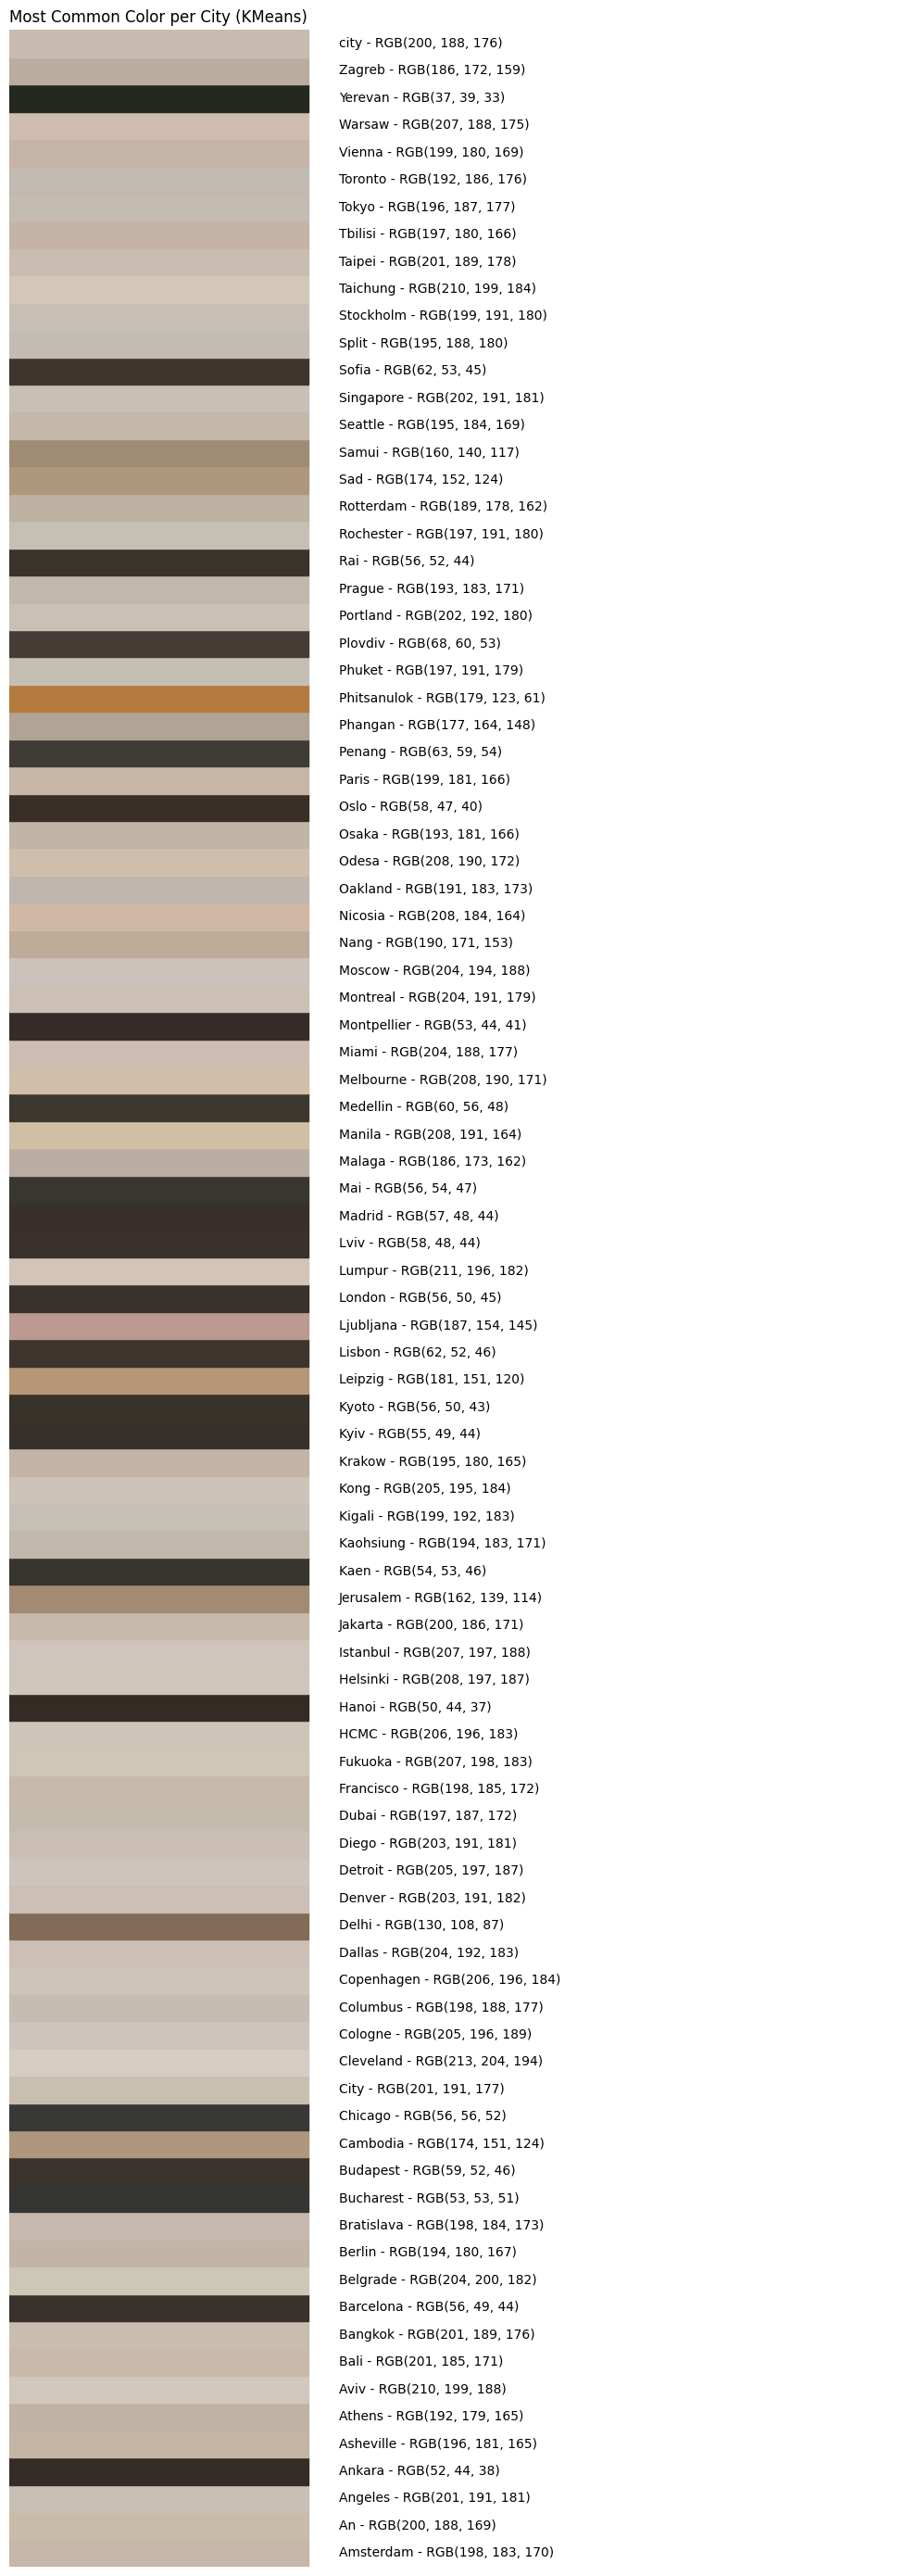

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
from sklearn.cluster import KMeans

# === CONFIG ===
CSV_FILE = "ig_visual_analysis.csv"
OUTPUT_SVG = "clustered_city_colors.svg"
N_CLUSTERS = 3

# === Load and clean data
df = pd.read_csv(CSV_FILE)
df = df.dropna(subset=["image_path", "dominant_rgb"])

# === Extract city from image_path
def extract_city(path):
    filename = os.path.basename(path).replace(".png", "")
    parts = filename.split("_")
    if len(parts) >= 3:
        city_parts = parts[2:]
        raw_city = " ".join(city_parts)
        raw_city = re.sub(r"(?i)(cafe|coffee|𝘾𝙊𝙁𝙁𝙀𝙀|𝗖𝗮𝗳𝗲|☕️|🧁|🍰|🥐|—|–|:)", "", raw_city)
        raw_city = re.sub(r"\s+", " ", raw_city)
        return raw_city.strip().split()[-1]
    return None

df["city"] = df["image_path"].apply(extract_city)

# === Parse RGB
df["rgb_tuple"] = df["dominant_rgb"].apply(
    lambda x: tuple(map(int, x.strip("()").split(","))) if pd.notnull(x) else None
)
df = df.dropna(subset=["rgb_tuple", "city"])

# === KMeans clustering to get dominant color per city
def dominant_color_kmeans(rgb_tuples, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(rgb_tuples)
    labels, counts = np.unique(kmeans.labels_, return_counts=True)
    dominant_cluster = labels[np.argmax(counts)]
    return tuple(map(int, kmeans.cluster_centers_[dominant_cluster]))

# Apply clustering per city
city_dominant_colors = []
for city, group in df.groupby("city"):
    color_array = np.array(group["rgb_tuple"].tolist())
    if len(color_array) >= 3:
        dom_rgb = dominant_color_kmeans(color_array, n_clusters=N_CLUSTERS)
        city_dominant_colors.append((city, dom_rgb))

# Create result DataFrame
result_df = pd.DataFrame(city_dominant_colors, columns=["city", "dominant_rgb"])
result_df[["r", "g", "b"]] = pd.DataFrame(result_df["dominant_rgb"].tolist(), index=result_df.index)

# === Plot color swatches
fig, ax = plt.subplots(figsize=(10, len(result_df) * 0.3))
for i, row in result_df.iterrows():
    rgb = tuple(row[["r", "g", "b"]])
    ax.add_patch(plt.Rectangle((0, i), 1, 1, color=[c / 255 for c in rgb]))
    ax.text(1.1, i + 0.5, f"{row['city']} - RGB{rgb}", va='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, len(result_df))
ax.axis("off")
plt.title("Most Common Color per City (KMeans)", loc="left")
plt.tight_layout()
plt.savefig(OUTPUT_SVG, format="svg")

# Optionally export RGB data as CSV
result_df.to_csv("clustered_city_colors.csv", index=False)

print("✅ Done. Saved to:")
print(f"  - {OUTPUT_SVG}")
print("  - clustered_city_colors.csv")


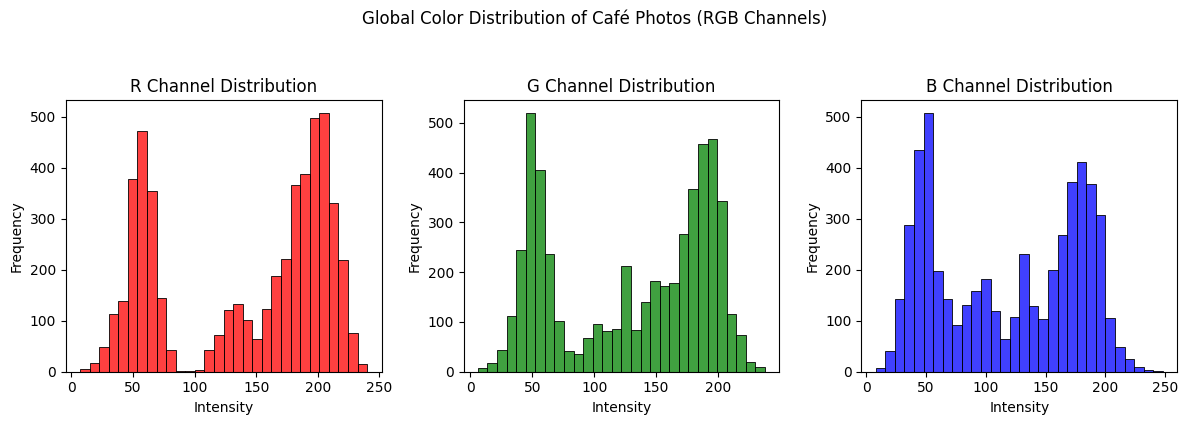

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("ig_visual_analysis.csv")

# Parse RGB string into tuples
df["rgb_tuple"] = df["dominant_rgb"].apply(
    lambda x: tuple(map(int, x.strip("()").split(","))) if pd.notnull(x) else None
)
df = df.dropna(subset=["rgb_tuple"])

# Extract R, G, B into separate columns
df["r"] = df["rgb_tuple"].apply(lambda x: x[0])
df["g"] = df["rgb_tuple"].apply(lambda x: x[1])
df["b"] = df["rgb_tuple"].apply(lambda x: x[2])

# Plot RGB histograms
plt.figure(figsize=(12, 4))
for i, color in enumerate(["r", "g", "b"]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[color], bins=30, kde=False, color=color)
    plt.title(f"{color.upper()} Channel Distribution")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")

plt.suptitle("Global Color Distribution of Café Photos (RGB Channels)", y=1.05)
plt.tight_layout()
plt.savefig("color_distribution_histogram.png", dpi=300)
plt.show()


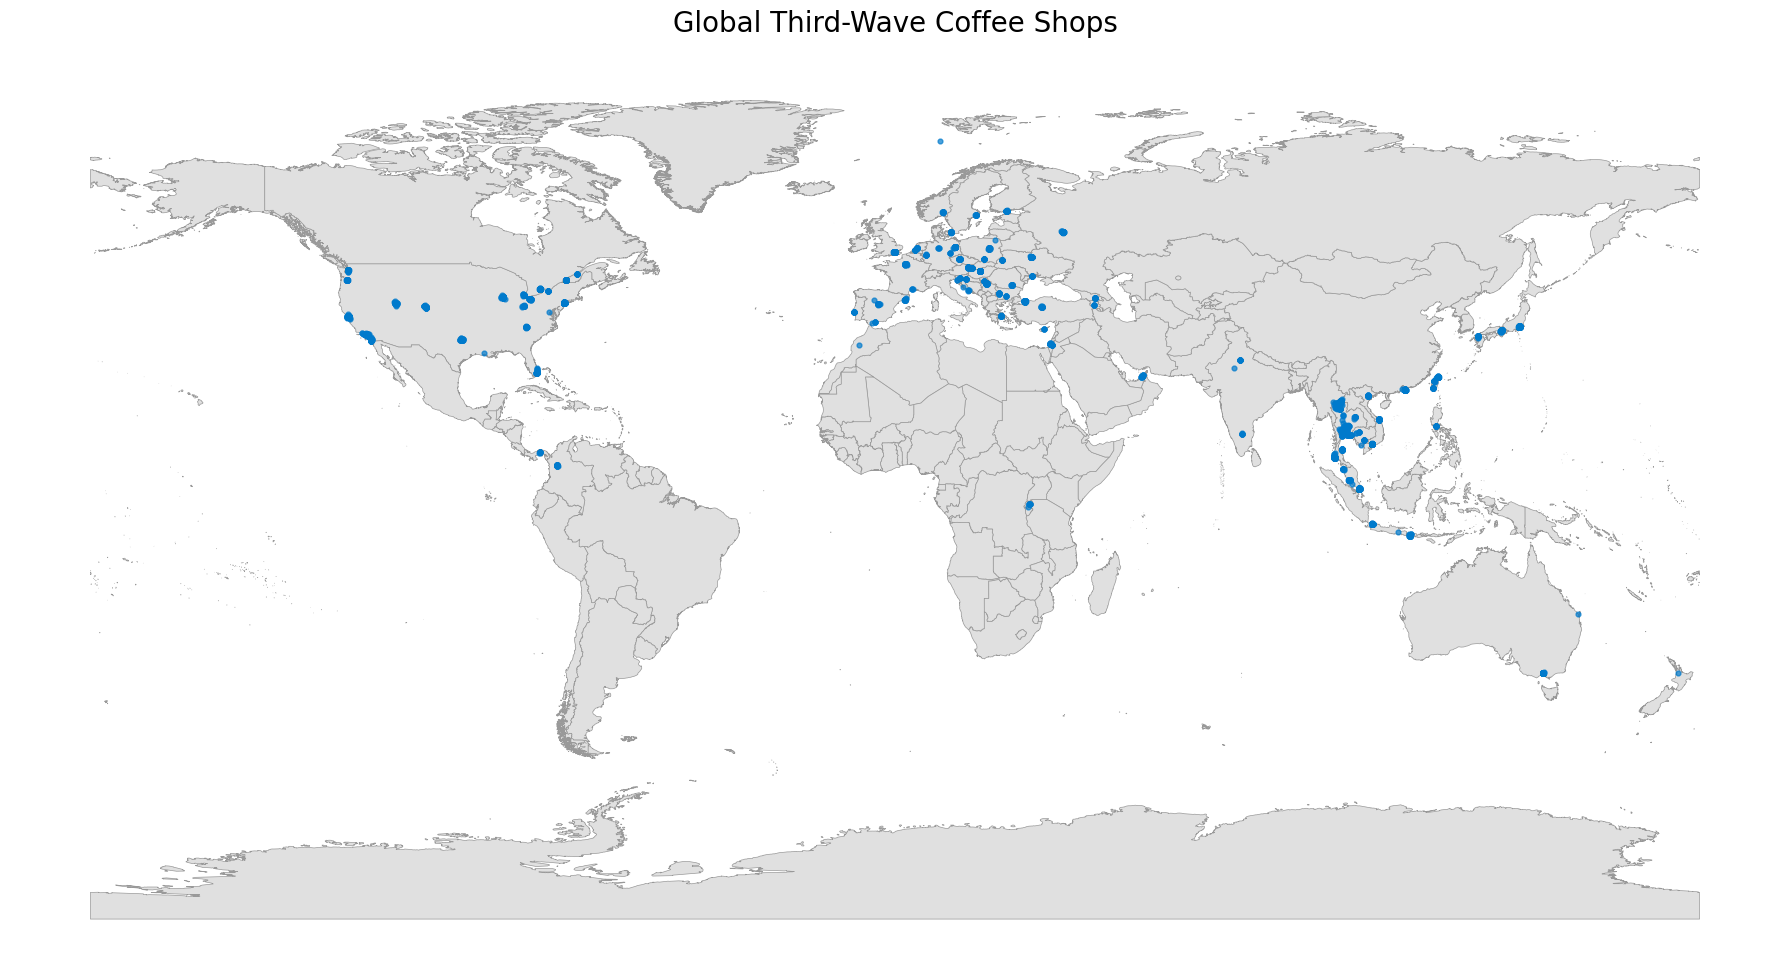

In [19]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# === FILE PATHS ===
geojson_path = "/Users/chivo/Downloads/custom.geo (1).json"
csv_path = "/Users/chivo/Downloads/data_studio/coffee/all_thirdwave_places.csv"
output_svg = "/Users/chivo/Downloads/data_studio/coffee/global_thirdwave_map.svg"

# === LOAD WORLD MAP ===
world = gpd.read_file(geojson_path)

# === LOAD CAFE LOCATIONS ===
df = pd.read_csv(csv_path)
lat_col = "latitude"
lon_col = "longitude"
df = df.dropna(subset=[lat_col, lon_col])

# === CONVERT TO GEODATAFRAME ===
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df[lon_col], df[lat_col]),
    crs="EPSG:4326"
)

# === PLOT ===
fig, ax = plt.subplots(figsize=(18, 12))

# Slightly darker background and visible outlines
world.plot(ax=ax, color="#e0e0e0", edgecolor="#999999", linewidth=0.5)

# Coffee shop dots
gdf.plot(ax=ax, color="#007acc", markersize=12, alpha=0.7)

# Clean presentation
ax.set_axis_off()
fig.patch.set_facecolor('white')
plt.title("Global Third-Wave Coffee Shops", fontsize=20, pad=20)

# === EXPORT TO SVG ===
plt.tight_layout()
plt.savefig(output_svg, format="svg", bbox_inches="tight")
plt.show()
